<a href="https://colab.research.google.com/github/Mouazzama-dev/demo-repo/blob/master/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import IPython.display as ipd
import pandas as pd
import librosa
%matplotlib inline
import librosa.display
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

In [7]:

path = "/content/download.wav"

sample, sample_rate=librosa.load(path)
ipd.Audio(path)


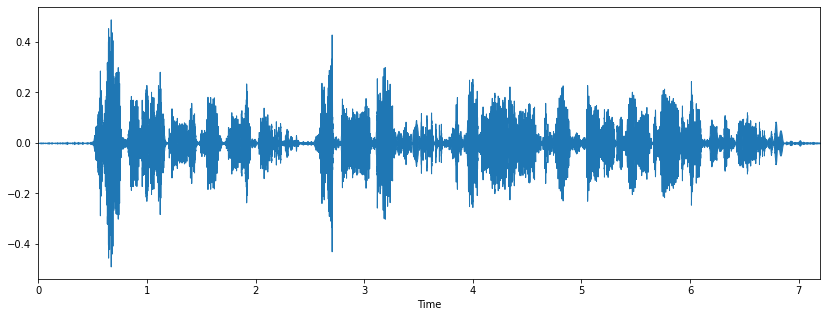

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sample, sr=sample_rate)

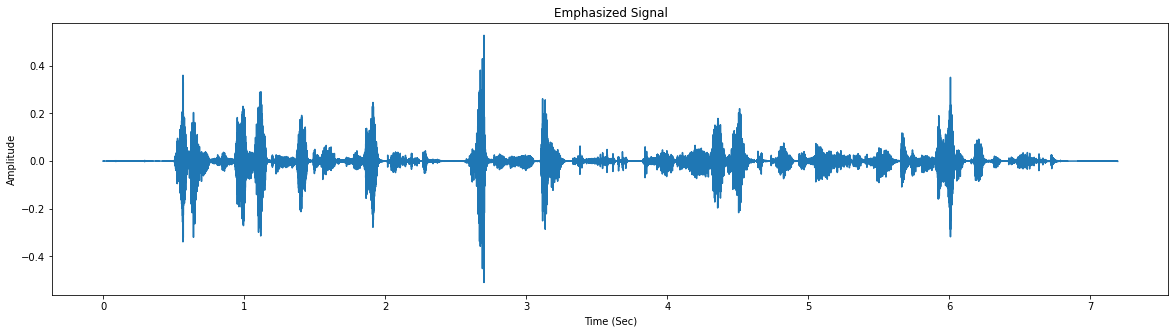

In [9]:
pre_emphasis = 1
emphasized_signal = np.append(sample[0], sample[1:] - pre_emphasis * sample[:-1])
Time=np.linspace(0, len(emphasized_signal)/sample_rate, num=len(emphasized_signal))

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [10]:
ipd.Audio(emphasized_signal, rate=sample_rate)

In [11]:
librosa.output.write_wav('/content/filtered.wav', emphasized_signal, sample_rate, norm=True)

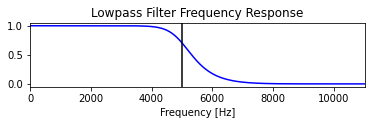

In [12]:

def butter_lowpass(cutoff, fs, order=5):
    #  Cutoff: cutoff frequency
    #  Fs sampling rate
    nyq = 0.5 * fs                     #  Signal frequency
    normal_cutoff = cutoff / nyq    #  Normal cutoff frequency = cutoff frequency / signal frequency
    b, a = butter(order, normal_cutoff, btype='lowpass', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y  # Filter requirements.



order = 6
fs = sample_rate                                       #  Sampling rate, Hz
cutoff = 5000                    #  The desired cutoff frequency of the filter, Hz # gets the filter coefficient so that we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)         #  Draw frequency response
w, h = freqz(b, a)
plt.subplot(3, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
   
filtered_signal = butter_lowpass_filter(emphasized_signal, cutoff, fs, order)

plt.show()

In [13]:
ipd.Audio(filtered_signal, rate=sample_rate)

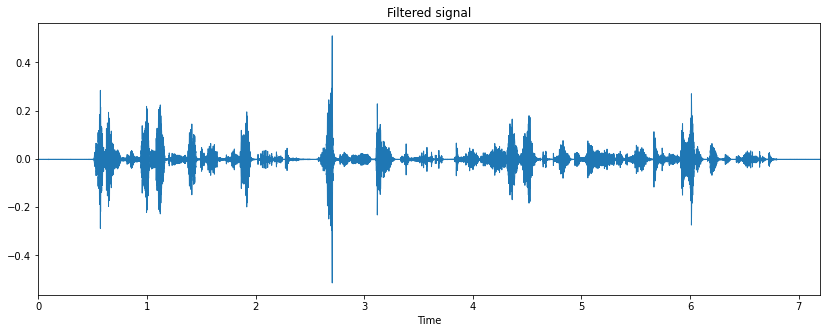

In [14]:
plt.figure(figsize=(14, 5))
plt.title("Filtered signal")
librosa.display.waveplot(filtered_signal, sr=sample_rate)

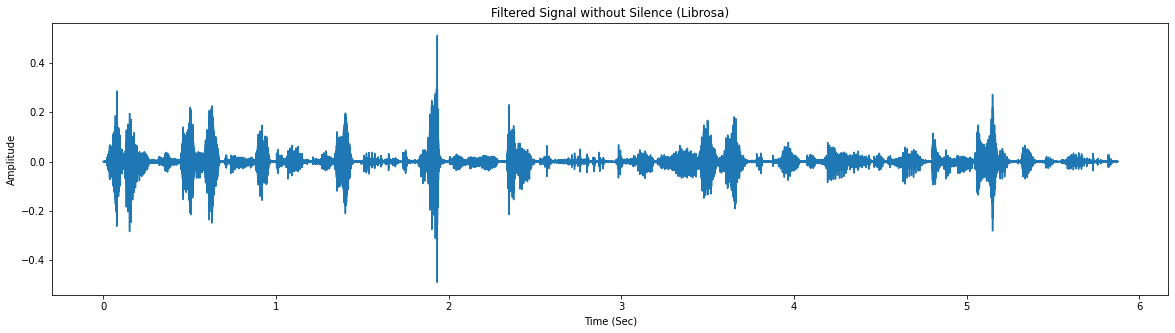

In [27]:
y = librosa.effects.split(filtered_signal,top_db=30)
l = []
for i in y:
    l.append( filtered_signal[i[0]:i[1]] )
filtered_signal = np.concatenate(l,axis=0)

Time=np.linspace(0, len(filtered_signal)/sample_rate, num=len(filtered_signal))

plt.figure(figsize=(20,5))
plt.plot(Time,filtered_signal)
plt.title('Filtered Signal without Silence (Librosa)')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [17]:
ipd.Audio(filtered_signal, rate=sample_rate)

In [21]:
frame_size = 0.025
frame_stride = 0.01

frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(filtered_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(filtered_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=True)]
#Framming done

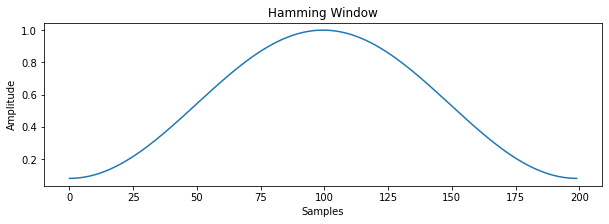

In [22]:
#Windowing ==> i use hamming windowing 
#formulated as w[n]=0.54−0.46cos(2πnN−1) . where 0≤n≤N−1
#setting for humming
x = np.hamming(200)
#plot humming (remove later)
plt.figure(figsize=(10,3))
plt.plot(x)
plt.title('Hamming Window')
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.show()

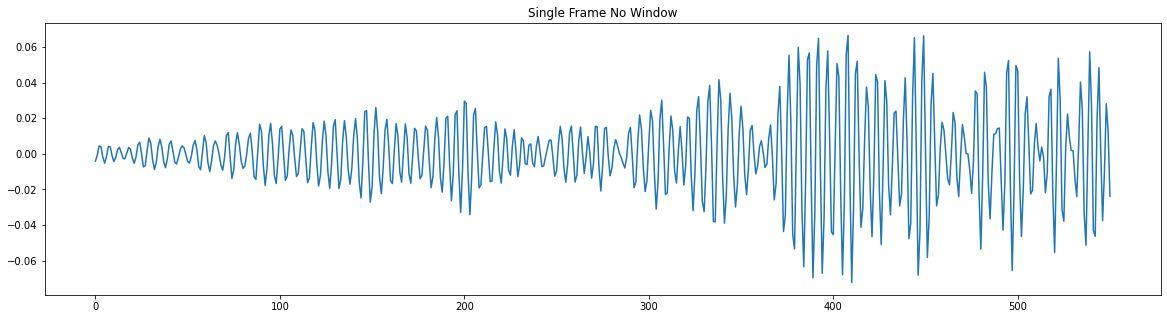

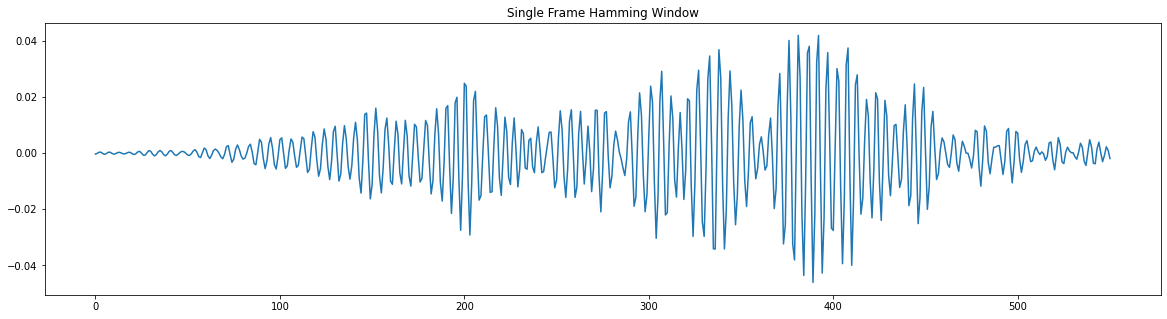

In [23]:
f = frames * np.hamming(frame_length)
x = frames[2]
plt.figure(figsize=(20,5))
plt.plot(x)
plt.title("Single Frame No Window")
plt.show()

x = f[2]
plt.figure(figsize=(20,5))
plt.plot(x)
plt.title("Single Frame Hamming Window")
plt.show()

frames = f

In [24]:
NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT

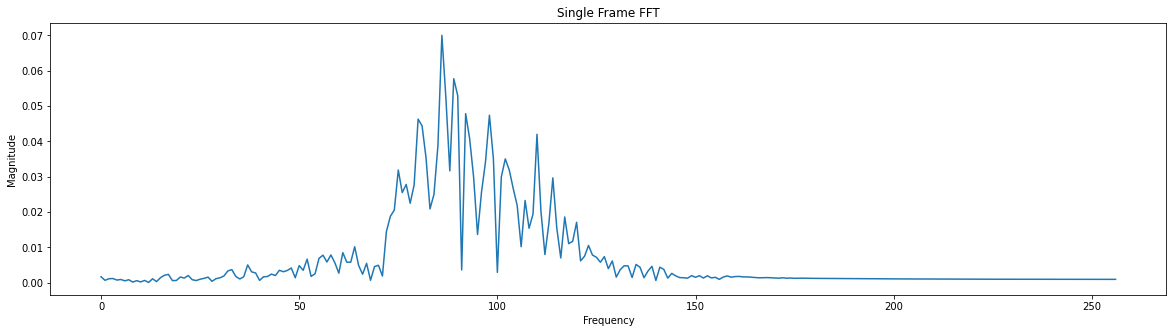

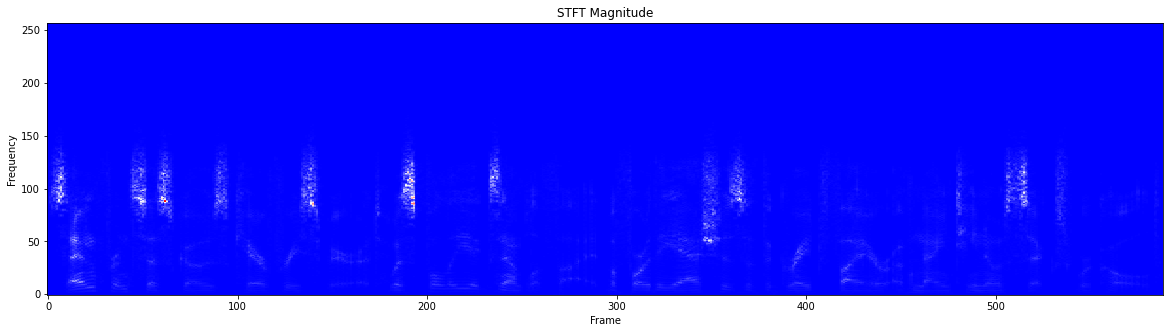

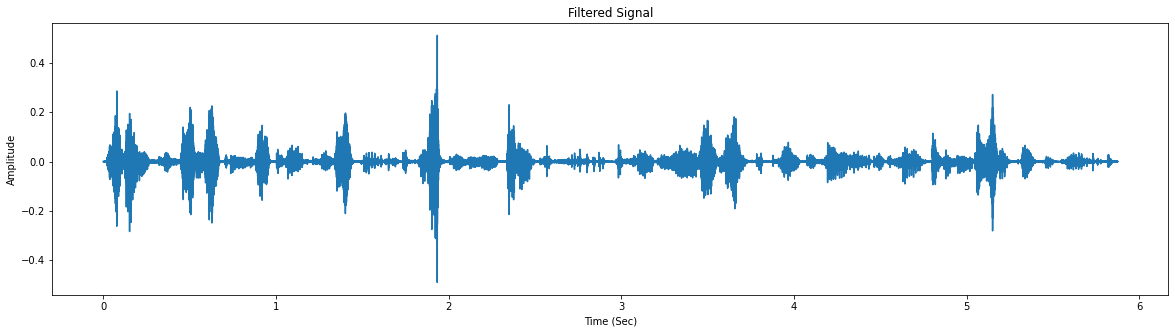

In [28]:
plt.figure(figsize=(20,5))
plt.plot(mag_frames[0])
plt.title("Single Frame FFT")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(mag_frames.T, interpolation='nearest', cmap= plt.cm.bwr, origin='lower', aspect='auto')
plt.title("STFT Magnitude")
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Time,filtered_signal)
plt.title('Filtered Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os
sound_file = AudioSegment.from_wav("/content/filtered.wav")
audio_chunks = split_on_silence(sound_file, min_silence_len=30, silence_thresh=-53) 
os.mkdir('/content/chunks') 

for i, chunk in enumerate(audio_chunks):
   out_file = "chunks/chunk{0}.mp3".format(i)
   print("exporting", out_file)
   chunk.export(out_file, format="mp3")

exporting chunks/chunk0.mp3
exporting chunks/chunk1.mp3
exporting chunks/chunk2.mp3
exporting chunks/chunk3.mp3
exporting chunks/chunk4.mp3
exporting chunks/chunk5.mp3
exporting chunks/chunk6.mp3
exporting chunks/chunk7.mp3
exporting chunks/chunk8.mp3
exporting chunks/chunk9.mp3
exporting chunks/chunk10.mp3
exporting chunks/chunk11.mp3
exporting chunks/chunk12.mp3
exporting chunks/chunk13.mp3


In [ ]:
import IPython.display as ipd

sound_files = []
chunks = os.listdir('/content/chunks')
for chunk in chunks:
  chunk = f'/content/chunks/{chunk}'
  print(chunk)
  sound_files.append(ipd.Audio(chunk))

/content/chunks/chunk12.mp3
/content/chunks/chunk5.mp3
/content/chunks/chunk2.mp3
/content/chunks/chunk10.mp3
/content/chunks/chunk6.mp3
/content/chunks/chunk9.mp3
/content/chunks/chunk1.mp3
/content/chunks/chunk8.mp3
/content/chunks/chunk13.mp3
/content/chunks/chunk3.mp3
/content/chunks/chunk11.mp3
/content/chunks/chunk4.mp3
/content/chunks/chunk7.mp3
/content/chunks/chunk0.mp3


In [ ]:
ipd.Audio('/content/chunks/chunk4.mp3')